# Importation des librairies

In [1]:
import pickle
import numpy as np
import pandas as pd
from pycaret.classification import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Options de Réglages sur l'Organisation, l'Affichage Qualitatif des Données
pd.set_option("display.max.columns", None) # Pour afficher toutes les colonnes
pd.set_option('display.max_rows', None) # Pour afficher toutes les lignes
pd.set_option("max_colwidth", 40) # Pour afficher les colonnes jusqu'à une largeur maxi
pd.set_option("precision", 4) # Pour afficher seulement n chiffres après la virgule*
pd.options.display.float_format = '{:.2f}'.format # Pour remplacer l'affichage scientifique des nombres en décimal
pd.options.mode.chained_assignment = None  # default='warn'

# Les données d'entrée

In [3]:
# train_data_final.pkl

with open('train_data_final.pkl', 'rb') as f:
    train_data_final = pickle.load(f)

In [4]:
train_data_final.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0         202500.00   406597.50   
1      100003       0             0         270000.00  1293502.50   
2      100004       0             0          67500.00   135000.00   
3      100006       0             0         135000.00   312682.50   
4      100007       0             0         121500.00   513000.00   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0     24700.50        351000.00                        0.02       25.92   
1     35698.50       1129500.00                        0.00       45.94   
2      6750.00        135000.00                        0.01       52.19   
3     29686.50        297000.00                        0.01       52.06   
4     21865.50        513000.00                        0.03       54.59   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0        -637.00           -3648.00            -2120          nan           1   
1       -1188.00           -1186.00             -291          nan           1   
2        -225.00           -4260.00            -2531        26.00           1   
3       -3040.00           -9832.00            -2437          nan           1   
4       -3038.00           -4312.00            -3458          nan           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

   CNT_FAM_MEMBERS  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0             1.00                       10                           0   
1             2.00                       11                           0   
2             1.00                        9                           0   
3             2.00                       17                           0   
4             1.00                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0          0.08          0.26          0.14            0.02              0.04   
1          0.31          0.62          0.50            0.10              0.05   
2          0.62          0.56          0.73             nan               nan   
3          0.61          0.65          0.52             nan               nan   
4          0.65          0.32          0.54             nan               nan   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
0                         0.97             0.62            0.01   
1                         0.98             0.80            0.06   
2                          nan              nan             nan   
3                          nan              nan             nan   
4                          nan              nan       

In [5]:
train_data_final.shape

(10000, 1622)

In [6]:
list(train_data_final.columns)

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_

In [7]:
df = train_data_final
# compter le nombre de valeurs type "NaN"
column_with_nan = df.isnull().sum(axis=0) # ou # mis_val = df.isna().sum(axis=0)
# calculer le pourcentage de valeur type "NaN"
t_percent_mis_val= round((column_with_nan /(df.shape[0]))*100,None)

# compter le nombre de valeurs type "Zéro"
zero_val = (df == 0.00).astype(int).sum(axis=0)
# calculer le pourcentage de valeur type "Zéro"
zero_val_percent = round((zero_val / (df.shape[0]))*100,None)

# compter le nombre de valeurs disposnible
available_val=df[df.columns].count()
# calculer le pourcentage des valeurs disponibles
available_val_percent = round((available_val / (df.shape[0]))*100,None)

bilan_remplissage_table = pd.concat([column_with_nan, t_percent_mis_val, available_val, available_val_percent, zero_val, zero_val_percent], axis=1)
bilan_remplissage_table = bilan_remplissage_table.rename(columns = {0 : 'Nb Values (NaN)', 1:'% of NaN Values' , 2:'Nb Available Values', 3:'% of Available Values',
                                                                    4:'Total of Zero Values', 5:'% Total of Zero Values'})

#bilan_remplissage_table

In [8]:
bilan_remplissage_table

,Nb Values (NaN),% of NaN Values,Nb Available Values,% of Available Values,Total of Zero Values,% Total of Zero Values
SK_ID_CURR,0,0.00,10000,100.00,0,0.00
TARGET,0,0.00,10000,100.00,9225,92.00
CNT_CHILDREN,0,0.00,10000,100.00,7006,70.00
AMT_INCOME_TOTAL,0,0.00,10000,100.00,0,0.00
AMT_CREDIT,0,0.00,10000,100.00,0,0.00
AMT_ANNUITY,0,0.00,10000,100.00,0,0.00
AMT_GOODS_PRICE,7,0.00,9993,100.00,0,0.00
REGION_POPULATION_RELATIVE,0,0.00,10000,100.00,0,0.00
DAYS_BIRTH,0,0.00,10000,100.00,0,0.00
DAYS_EMPLOYED,1774,18.00,8226,82.00,0,0.00


In [9]:
selection = bilan_remplissage_table[(bilan_remplissage_table['Nb Values (NaN)'] == 0) & (bilan_remplissage_table['Nb Available Values'] == 10000)]
selection 

,Nb Values (NaN),% of NaN Values,Nb Available Values,% of Available Values,Total of Zero Values,% Total of Zero Values
SK_ID_CURR,0,0.00,10000,100.00,0,0.00
TARGET,0,0.00,10000,100.00,9225,92.00
CNT_CHILDREN,0,0.00,10000,100.00,7006,70.00
AMT_INCOME_TOTAL,0,0.00,10000,100.00,0,0.00
AMT_CREDIT,0,0.00,10000,100.00,0,0.00
AMT_ANNUITY,0,0.00,10000,100.00,0,0.00
REGION_POPULATION_RELATIVE,0,0.00,10000,100.00,0,0.00
DAYS_BIRTH,0,0.00,10000,100.00,0,0.00
DAYS_REGISTRATION,0,0.00,10000,100.00,1,0.00
DAYS_ID_PUBLISH,0,0.00,10000,100.00,1,0.00


In [10]:
list(selection.index)

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_21',
 'MISSING_VALS_TOTAL_APP',
 'CREDIT_INCOME_RATIO',
 'CREDIT_ANNUITY_RATIO',
 'ANNUITY_INCOME_RATIO',


## Choix des features pertinentes au regards de l'EDA 

In [11]:
column_names = [
    'SK_ID_CURR',
    'TARGET',
    'CNT_CHILDREN',
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'REGION_POPULATION_RELATIVE',
    'DAYS_BIRTH',
    'DAYS_REGISTRATION',
    'DAYS_ID_PUBLISH',
    'FLAG_MOBIL',
    'FLAG_EMP_PHONE',
    'FLAG_WORK_PHONE',
    'FLAG_CONT_MOBILE',
    'FLAG_PHONE',
    'FLAG_EMAIL',
    'CNT_FAM_MEMBERS',
    'HOUR_APPR_PROCESS_START',
    'REG_REGION_NOT_LIVE_REGION',
    'REG_REGION_NOT_WORK_REGION',
    'LIVE_REGION_NOT_WORK_REGION',
    'REG_CITY_NOT_LIVE_CITY',
    'REG_CITY_NOT_WORK_CITY',
    'LIVE_CITY_NOT_WORK_CITY',
    'EXT_SOURCE_1',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3',
    'DAYS_LAST_PHONE_CHANGE']

In [12]:
train_data = train_data_final[column_names]
train_data.shape

(10000, 28)

## Le Dataset final

In [13]:
dataset = train_data

In [14]:
dataset.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE
0,100002,1,0,202500.00,406597.50,24700.50,0.02,25.92,-3648.00,-2120,1,1,0,1,1,0,1.00,10,0,0,0,0,0,0,0.08,0.26,0.14,-1134.00
1,100003,0,0,270000.00,1293502.50,35698.50,0.00,45.94,-1186.00,-291,1,1,0,1,1,0,2.00,11,0,0,0,0,0,0,0.31,0.62,0.50,-828.00
2,100004,0,0,67500.00,135000.00,6750.00,0.01,52.19,-4260.00,-2531,1,1,1,1,1,0,1.00,9,0,0,0,0,0,0,0.62,0.56,0.73,-815.00
3,100006,0,0,135000.00,312682.50,29686.50,0.01,52.06,-9832.00,-2437,1,1,0,1,0,0,2.00,17,0,0,0,0,0,0,0.61,0.65,0.52,-617.00
4,100007,0,0,121500.00,513000.00,21865.50,0.03,54.59,-4312.00,-3458,1,1,0,1,0,0,1.00,11,0,0,0,0,1,1,0.65,0.32,0.54,-1106.00


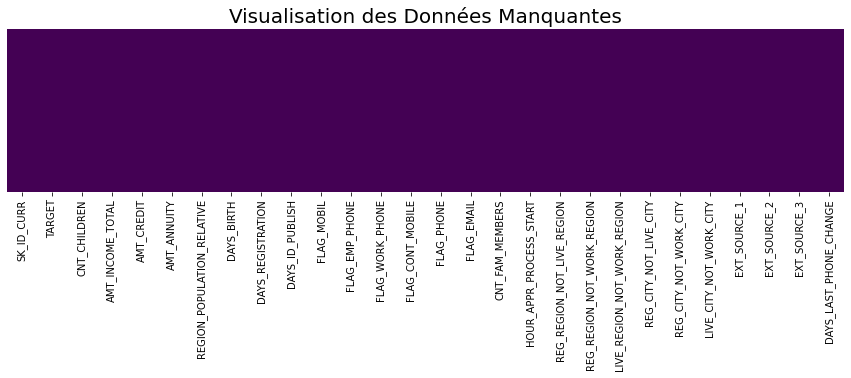

In [15]:
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.size'] = '10'
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Visualisation des Données Manquantes',fontsize=20)
plt.show()

## Le model de Données

In [16]:
data = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (9500, 28)
Unseen Data For Predictions: (500, 28)


In [17]:
data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE
0,111322,0,0,225000.00,545040.00,19705.50,0.01,42.69,-3848.00,-5208,1,1,0,1,1,0,2.00,16,0,0,0,0,0,0,0.54,0.75,0.55,-2204.00
1,102032,0,0,225000.00,291384.00,20853.00,0.02,41.22,-2122.00,-4236,1,1,0,1,0,0,2.00,9,0,0,0,0,0,0,0.55,0.74,0.72,-1548.00
2,109729,1,2,45000.00,126000.00,13567.50,0.01,30.47,-8392.00,-3317,1,1,0,1,1,0,4.00,10,0,0,0,0,0,0,0.37,0.64,0.53,-2898.00
3,107598,0,0,90000.00,463500.00,20547.00,0.01,54.97,-7688.00,-1916,1,1,0,1,0,0,1.00,15,0,0,0,0,0,0,0.71,0.48,0.75,-1833.00
4,100448,0,2,202500.00,598486.50,25290.00,0.01,32.03,-2746.00,-3310,1,1,0,1,0,0,4.00,12,0,0,0,0,0,0,0.49,0.60,0.67,-2700.00


In [18]:
list(data.columns)

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_LAST_PHONE_CHANGE']

In [19]:
data_unseen.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE
0,111046,0,0,180000.00,379008.00,37998.00,0.01,25.05,-4020.00,-885,1,1,0,1,0,0,1.00,15,0,0,0,0,0,0,0.21,0.44,0.43,-1.00
1,111047,0,0,112500.00,202500.00,10125.00,0.02,56.66,-5408.00,-4090,1,0,0,1,0,0,2.00,10,0,0,0,0,0,0,0.72,0.57,0.70,-295.00
2,111049,0,1,139500.00,222768.00,17370.00,0.01,31.14,-4988.00,-3704,1,1,0,1,0,1,3.00,17,0,0,0,0,0,0,0.11,0.59,0.42,-576.00
3,111050,0,0,270000.00,1316155.50,38614.50,0.01,42.09,-1928.00,-4427,1,1,0,1,0,0,2.00,11,0,0,0,0,1,1,0.53,0.59,0.55,-1644.00
4,111051,0,0,315000.00,1546020.00,45202.50,0.07,56.44,-10224.00,-4029,1,0,0,1,0,0,2.00,11,0,0,0,0,0,0,0.70,0.54,0.24,0.00


In [20]:
list(data_unseen.columns)

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_LAST_PHONE_CHANGE']

# Configuration de l'environnement dans PyCaret

In [21]:
exp_clf101 = setup(data = data, target = 'TARGET', session_id=123) 

,Description,Value
0,session_id,123
1,Target,TARGET
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(9500, 28)"
5,Missing Values,False
6,Numeric Features,27
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


# Comparer tous les modèles

In [22]:
#compare_models()
#best_model = compare_models(fold=10)
compare_models(fold=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9210,0.6052,0.0000,0.0000,0.0000,0.0000,0.0000,5.5260
nb,Naive Bayes,0.9210,0.6258,0.0000,0.0000,0.0000,0.0000,0.0000,0.0180
ridge,Ridge Classifier,0.9210,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3430
rf,Random Forest Classifier,0.9209,0.7142,0.0000,0.0000,0.0000,-0.0003,-0.0011,0.6310
et,Extra Trees Classifier,0.9207,0.7051,0.0000,0.0000,0.0000,-0.0006,-0.0023,0.3910
lda,Linear Discriminant Analysis,0.9185,0.7501,0.0209,0.4576,0.0391,0.0288,0.0755,0.0900
gbc,Gradient Boosting Classifier,0.9168,0.7456,0.0189,0.1893,0.0335,0.0210,0.0364,0.8930
lightgbm,Light Gradient Boosting Machine,0.9165,0.7160,0.0304,0.2131,0.0531,0.0374,0.0562,0.2550
xgboost,Extreme Gradient Boosting,0.9164,0.6995,0.0438,0.2941,0.0741,0.0557,0.0839,1.9370
knn,K Neighbors Classifier,0.9156,0.5350,0.0171,0.1777,0.0308,0.0166,0.0307,0.0920


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Créer un modèle

> Decision Tree Classifier ('dt') \
> K Neighbors Classifier ('knn') \
> Random Forest Classifier ('rf') 

## Decision Tree Classifier

In [23]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8541,0.5601,0.2115,0.1642,0.1849,0.1062,0.1072
1,0.8647,0.5570,0.1923,0.1724,0.1818,0.1083,0.1085
2,0.8436,0.4928,0.0769,0.0667,0.0714,-0.0135,-0.0135
3,0.8662,0.5754,0.2308,0.1967,0.2124,0.1398,0.1403
4,0.8812,0.5822,0.2264,0.2400,0.2330,0.1687,0.1688
5,0.8436,0.5531,0.2075,0.1507,0.1746,0.0906,0.0920
6,0.8632,0.5982,0.2830,0.2206,0.2479,0.1739,0.1756
7,0.8496,0.4961,0.0755,0.0727,0.0741,-0.0077,-0.0077
8,0.8511,0.5314,0.1509,0.1290,0.1391,0.0582,0.0584
9,0.8419,0.5271,0.1538,0.1159,0.1322,0.0471,0.0477


In [24]:
#trained model object is stored in the variable 'dt'. 
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [25]:
dt.feature_importances_

array([0.0657067 , 0.02014486, 0.05541212, 0.04901474, 0.06720531,
       0.05826175, 0.06312007, 0.06636652, 0.08893978, 0.        ,
       0.00086706, 0.00275741, 0.        , 0.00430845, 0.0009876 ,
       0.01473287, 0.06355287, 0.00154141, 0.        , 0.0020853 ,
       0.00762363, 0.00391918, 0.00396377, 0.10116037, 0.10553591,
       0.09681809, 0.05597425])

## K Neighbors Classifier

In [26]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9098,0.4819,0.0192,0.1000,0.0323,0.0072,0.0100
1,0.9173,0.5528,0.0192,0.2000,0.0351,0.0217,0.0395
2,0.9203,0.5625,0.0385,0.4000,0.0702,0.0572,0.1043
3,0.9143,0.5503,0.0000,0.0000,0.0000,-0.0139,-0.0254
4,0.9158,0.5560,0.0000,0.0000,0.0000,-0.0086,-0.0198
5,0.9218,0.5765,0.0377,0.6667,0.0714,0.0634,0.1459
6,0.9113,0.4919,0.0189,0.1250,0.0328,0.0121,0.0185
7,0.9113,0.5086,0.0000,0.0000,0.0000,-0.0165,-0.0281
8,0.9158,0.5190,0.0377,0.2857,0.0667,0.0490,0.0785
9,0.9187,0.5508,0.0000,0.0000,0.0000,-0.0058,-0.0160


In [27]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


## Random Forest Classifier

In [28]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9218,0.7027,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9218,0.7034,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9203,0.6965,0.0000,0.0000,0.0000,-0.0030,-0.0113
3,0.9218,0.6965,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9203,0.7057,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9203,0.7029,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9203,0.7428,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9203,0.6810,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9203,0.7352,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.9217,0.7751,0.0000,0.0000,0.0000,0.0000,0.0000


In [29]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [30]:
rf.feature_importances_

array([0.06617207, 0.01400836, 0.04797582, 0.05948535, 0.06317315,
       0.05452608, 0.07116296, 0.06872617, 0.07370299, 0.        ,
       0.00479522, 0.00816437, 0.00056287, 0.00838633, 0.00444428,
       0.02145067, 0.04701607, 0.00229104, 0.00313974, 0.00255282,
       0.00627227, 0.00764239, 0.00701526, 0.0840059 , 0.10192977,
       0.11097065, 0.0604274 ])

# Ajuster un modèle

In [31]:
# tune multiple models dynamically
top3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9210,0.6052,0.0000,0.0000,0.0000,0.0000,0.0000,0.0770
nb,Naive Bayes,0.9210,0.6258,0.0000,0.0000,0.0000,0.0000,0.0000,0.0180
ridge,Ridge Classifier,0.9210,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0170
rf,Random Forest Classifier,0.9209,0.7142,0.0000,0.0000,0.0000,-0.0003,-0.0011,0.6790
et,Extra Trees Classifier,0.9207,0.7051,0.0000,0.0000,0.0000,-0.0006,-0.0023,0.4100
lda,Linear Discriminant Analysis,0.9185,0.7501,0.0209,0.4576,0.0391,0.0288,0.0755,0.0340
gbc,Gradient Boosting Classifier,0.9168,0.7456,0.0189,0.1893,0.0335,0.0210,0.0364,0.9400
lightgbm,Light Gradient Boosting Machine,0.9165,0.7160,0.0304,0.2131,0.0531,0.0374,0.0562,0.1490
xgboost,Extreme Gradient Boosting,0.9164,0.6995,0.0438,0.2941,0.0741,0.0557,0.0839,0.9110
knn,K Neighbors Classifier,0.9156,0.5350,0.0171,0.1777,0.0308,0.0166,0.0307,0.0760


In [32]:
tuned_top3 = [tune_model(i) for i in top3]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9218,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9218,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9218,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9218,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9203,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9203,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9203,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9203,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9203,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.9217,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


## Decision Tree Classifier

In [33]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9218,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9218,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9218,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9218,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9203,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9203,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9203,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9203,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9203,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.9217,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


In [34]:
# tune hyperparameters with increased n_iter
tuned_dt = tune_model(dt, n_iter = 50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9218,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9218,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9218,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9218,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9203,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9203,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9203,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9203,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9203,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.9217,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


In [35]:
# tune hyperparameters to optimize AUC
tuned_dt = tune_model(dt, optimize = 'AUC') #default is 'Accuracy'

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9218,0.7287,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9218,0.6914,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9218,0.6838,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9218,0.7244,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9203,0.7245,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9203,0.7038,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9203,0.7058,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9203,0.6539,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9203,0.7133,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.9217,0.7030,0.0000,0.0000,0.0000,0.0000,0.0000


In [36]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


## K Neighbors Classifier

In [37]:
tuned_knn = tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9218,0.5037,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9218,0.6054,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9218,0.5969,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9218,0.5706,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9203,0.5928,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9203,0.5631,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9203,0.5808,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9203,0.5838,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9203,0.5402,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.9217,0.6060,0.0000,0.0000,0.0000,0.0000,0.0000


## Random Forest Classifier

In [38]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9218,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9218,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9218,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9218,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9203,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9203,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9203,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9203,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9203,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.9217,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


# Tracer de modèle Sans Ajustement

> A partir du modèle créer :

In [39]:
# créer un modèle 
# rf = create_model ('rf')

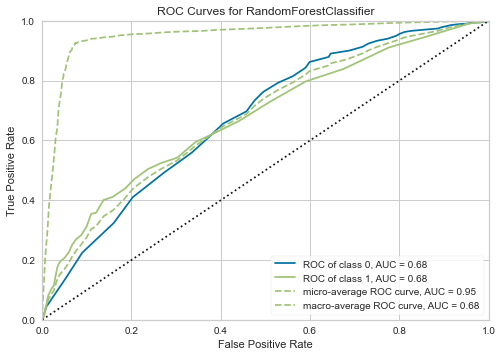

In [40]:
# AUC plot 
plot_model (rf, plot = 'auc')

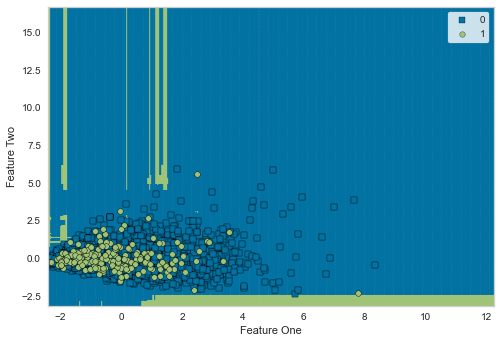

In [41]:
# Décision Boundary 
plot_model (rf, plot = 'boundary')

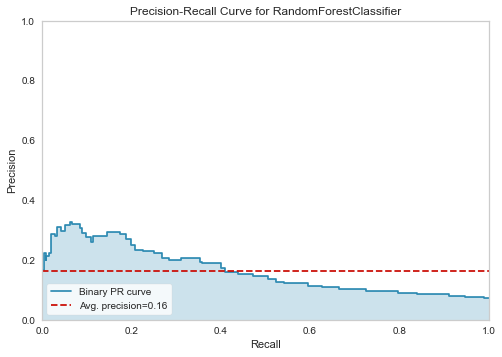

In [42]:
# Courbe de rappel de précision 
plot_model (rf, plot = 'pr')

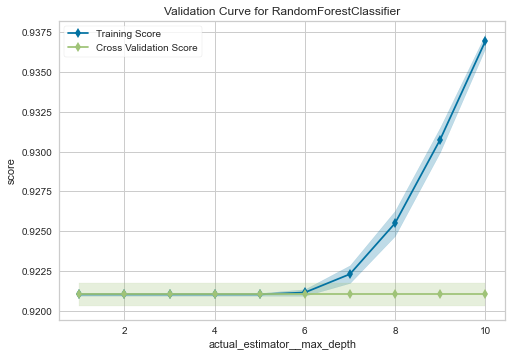

In [43]:
# Courbe de validation 
plot_model (rf, plot = 'vc')

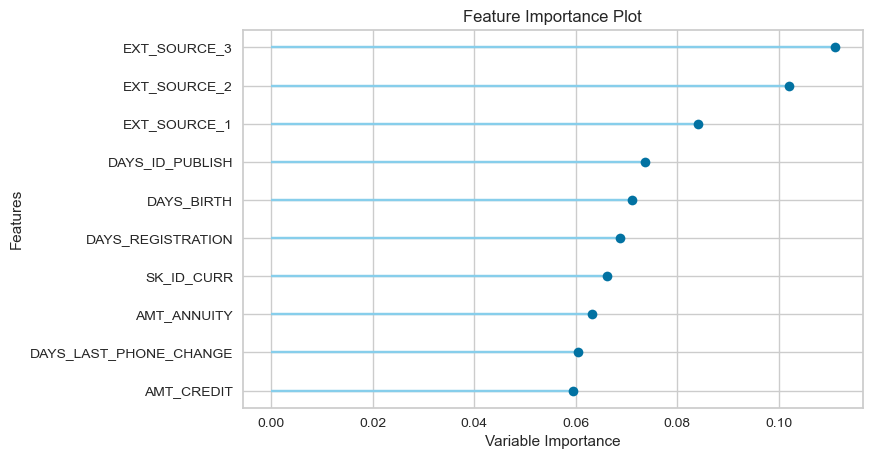

In [44]:
plot_model(rf, plot='feature')

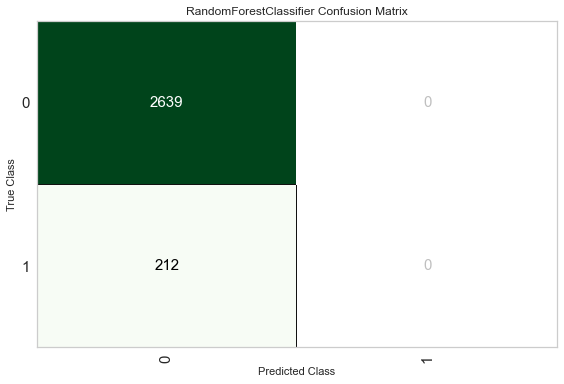

In [45]:
plot_model(rf, plot = 'confusion_matrix')

# Tracer de modèle Avec Ajustement

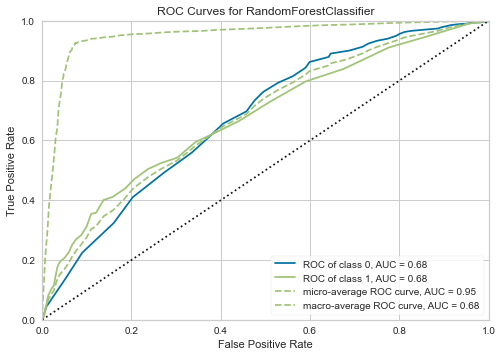

In [46]:
# AUC plot 
plot_model (rf, plot = 'auc')

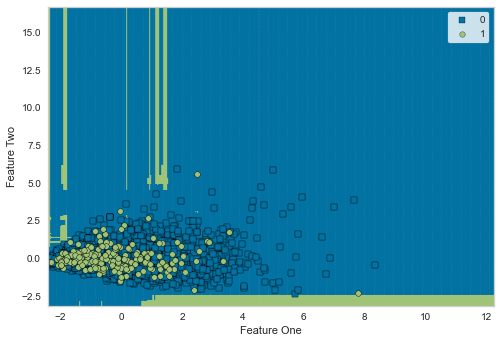

In [47]:
# Décision Boundary 
plot_model (rf, plot = 'boundary')

## Graphique AUC

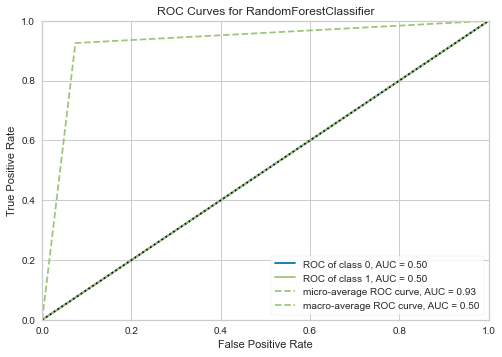

In [48]:
plot_model(tuned_rf, plot = 'auc')

## Décision Boundary

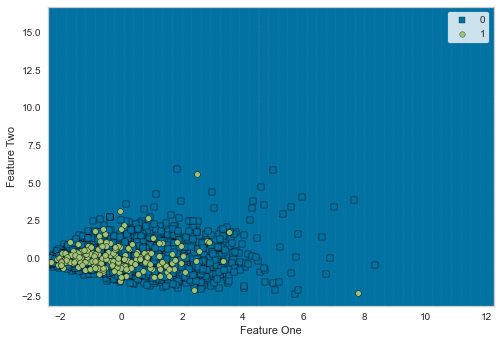

In [49]:
# Décision Boundary 
plot_model (tuned_rf, plot = 'boundary')

## Courbe de Precision-Recall

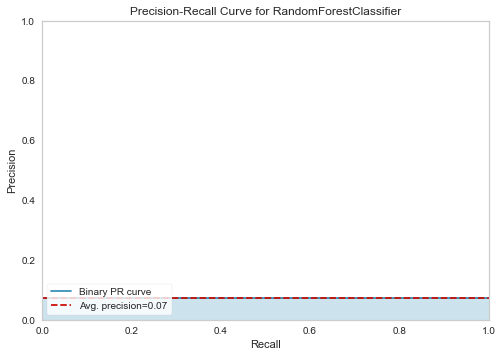

In [50]:
plot_model(tuned_rf, plot = 'pr')

## Courbe de validation 

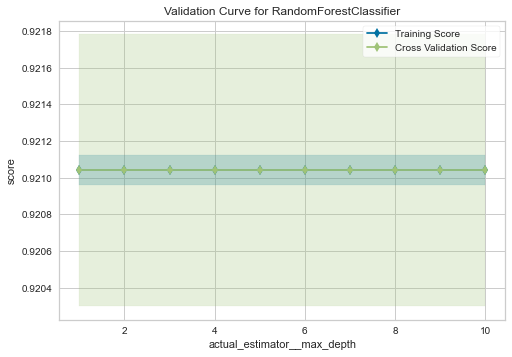

In [51]:
# Courbe de validation 
plot_model (tuned_rf, plot = 'vc')

## Graphe des Features Importances

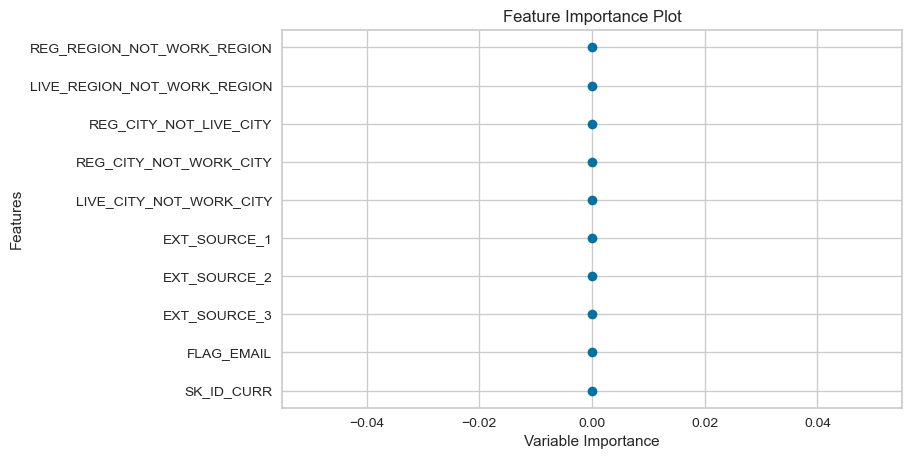

In [52]:
plot_model(tuned_rf, plot='feature')

## Confusion Matrix

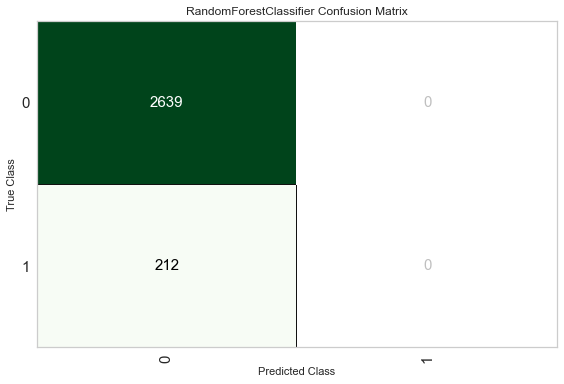

In [53]:
plot_model(tuned_rf, plot = 'confusion_matrix')

> Une autre façon d'analyser les performances des modèles consiste à utiliser la fonction __evaluation_model()__ qui affiche une interface utilisateur pour tous les tracés disponibles pour un modèle donné. Il utilise en interne la fonction plot_model().

# Autre méthode : Evaluation modele (Dashboard)

In [54]:
#evaluate_model(tuned_rf)
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# SHAP : Interpretation de la modelisation 

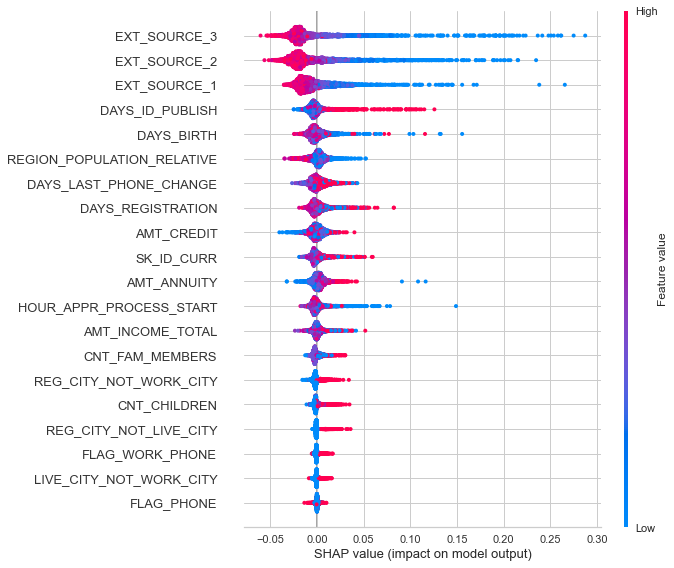

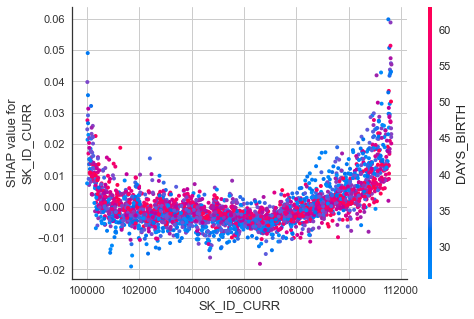

In [55]:
# (à partir de la) création un modèle
#rf = create_model ('rf')
# graphique récapitulatif 
interpret_model (rf)
# Corrélation plot 
interpret_model (rf, plot = 'correlation')

In [56]:
interpret_model (rf, plot = 'reason', observation = 0)

# Prédiction sur test / hold-out Échantillon

Avant de finaliser le modèle, il est conseillé d'effectuer une dernière vérification en prédisant l'ensemble test/hold-out et en passant en revue les métriques d'évaluation. Si vous regardez la grille d'information de la section "Setting up Environment in PyCaret, exp_clf101" ci-dessus, vous verrez que 30 % (6 841 échantillons) des données ont été séparés en tant qu'échantillon de test/d'attente. Toutes les mesures d'évaluation que nous avons vues ci-dessus sont des résultats à validation croisée basés sur l'ensemble d'entraînement (70 %) uniquement. Maintenant, en utilisant notre modèle formé final stocké dans la variable tuned_rf, nous allons prédire par rapport à l'échantillon retenu et évaluer les métriques pour voir si elles sont matériellement différentes des résultats du CV.

In [57]:
# test de prédiction 
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9256,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


La précision sur l'ensemble test/hold-out est de 0,8126 par rapport à 0,8229 obtenu sur les résultats du CV tuned_rf (dans la section "Random Forest Classifier" ci-dessus). Ce n'est pas une différence significative. S'il y a une grande variation entre les résultats du test/hold-out et du CV, cela indiquerait normalement un ajustement excessif, mais cela pourrait également être dû à plusieurs autres facteurs et nécessiterait une enquête plus approfondie. Dans ce cas, nous continuerons à finaliser le modèle et à prédire sur des données invisibles (les 5% que nous avions séparés au début et jamais exposés à PyCaret).

(ASTUCE : il est toujours bon de regarder l'écart type des résultats du CV lors de l'utilisation de create_model().)

# Finaliser le modèle pour le déploiement

In [58]:
final_rf = finalize_model(tuned_rf)

In [59]:
#Final Random Forest model parameters for deployment
print(final_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=2, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


Attention : Un dernier mot d'avertissement. Une fois le modèle finalisé à l'aide de finalize_model(), l'ensemble de données complet, y compris l'ensemble test/hold-out, est utilisé pour l'entraînement. En tant que tel, si le modèle est utilisé pour les prédictions sur l'ensemble de blocage après l'utilisation de finalize_model(), la grille d'informations imprimée sera trompeuse car vous essayez de prédire sur les mêmes données que celles utilisées pour la modélisation. Afin de démontrer ce point uniquement, nous utiliserons final_rf sous predict_model() pour comparer la grille d'information avec celle ci-dessus dans la section "Predict on test / hold-out Sample".

In [60]:
predict_model(final_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.0744,0.5000,1.0000,0.0744,0.1384,0.0000,0.0000


> La fonction predict_model peut également prédire directement à partir du modèle hébergé sur AWS S3 à l'aide de la fonction deploy_model .

# Prédire sur des données invisibles (unseen data)

La fonction predict_model() est également utilisée pour prédire sur l'ensemble de données invisible. La seule différence par rapport à la section "Predict on test / hold-out Sample" ci-dessus est que cette fois nous passerons le paramètre data_unseen. data_unseen est la variable créée au début du didacticiel et contient 5% (1200 échantillons) de l'ensemble de données d'origine qui n'a jamais été exposé à PyCaret. (voir section "Le Dataset final/Le model de Données" pour explication)

In [61]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,Label,Score
0,111046,0,0,180000.00,379008.00,37998.00,0.01,25.05,-4020.00,-885,...,0,0,0,0,0.21,0.44,0.43,-1.00,1,0.50
1,111047,0,0,112500.00,202500.00,10125.00,0.02,56.66,-5408.00,-4090,...,0,0,0,0,0.72,0.57,0.70,-295.00,1,0.50
2,111049,0,1,139500.00,222768.00,17370.00,0.01,31.14,-4988.00,-3704,...,0,0,0,0,0.11,0.59,0.42,-576.00,1,0.50
3,111050,0,0,270000.00,1316155.50,38614.50,0.01,42.09,-1928.00,-4427,...,0,0,1,1,0.53,0.59,0.55,-1644.00,1,0.50
4,111051,0,0,315000.00,1546020.00,45202.50,0.07,56.44,-10224.00,-4029,...,0,0,0,0,0.70,0.54,0.24,0.00,1,0.50


Les colonnes Label et Score sont ajoutées à l'ensemble data_unseen. L'étiquette est la prédiction et le score est la probabilité de la prédiction. Notez que les résultats prédits sont concaténés à l'ensemble de données d'origine tandis que toutes les transformations sont automatiquement effectuées en arrière-plan.

# Enregistrement du modèle

In [62]:
save_model(final_rf,'Final_RF_Model_08_2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight='balanced',
                                         criterion='gini', max_depth=2,
                                         max_features='log2',
 

# Enregistrement de l'intégralité de l'expérience

> enregistrer l'intégralité de l'expérience composée de toutes les sorties intermédiaires dans un seul fichier binaire.

In [63]:
#saving an experiment
#save_experiment('experiment_28_aout_2021')
#save_experiment(experiment_name = 'experiment_28_aout_2021')

# Remarque pour le téléchargement 

Pour télécharger les opérations de sauvegarde :

> saved_model \
> saved_experiment 

on utilise :

> load_model \
> load_experiment 

qui sont des fonctions disponibles dans le module PyCaret.

In [64]:
#load_saved_model = load_model('Final_RF_Model_08_2021')

In [65]:
#load_experiment(experiment_name='experiment_28_aout_2021')
#load_saved_exp = load_experiment('experiment_28_aout_2021')